In [1]:
# Aux imports
import gempy as gp
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import gstools as gs
import pyvista as pv
import pyvistaqt as pvqt
import PVGeo
import glob
import random
from tqdm import tqdm
from numpy import cross, eye, dot
from scipy.linalg import expm, norm
from sklearn import preprocessing
from pyvista import set_plot_theme
np.random.seed(1515)
pd.set_option('precision', 2)
%matplotlib inline
set_plot_theme('document')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`


No module named 'osgeo'


C:\Users\pasha\python\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#define resolution and mesh size
reso=[50, 50, 50]
mesh_size = reso[0]*reso[1]*reso[2]
extent=[0, 1223, 0, 3000, -780, 0]
print(' mesh size: ' + str(mesh_size))

 mesh size: 125000


In [3]:
geo_data = gp.create_data('foresets', extent=extent, resolution=reso,
                          path_o="2_orientation_data_all.csv",
                          path_i="1_point_data_all.csv")

Active grids: ['regular']


In [4]:
gp.map_stack_to_surfaces(geo_data, {"Strat_Series1":('topo'),
                                    "Strat_Series2":('darkmatrix_porphyry3'),
                                    "Strat_Series3":('darkmatrix_porphyry2'),
                                    "Strat_Series4":('darkmatrix_porphyry'),
                                    "Strat_Series5":('host rock'),
                                    "Strat_Series6":('pitporphyryintrusion','centralaplite','southwestporphyry','questagraniteporphyry'),
                                    "Basement":('basement')})

,surface,series,order_surfaces,color,id
0,topo,Strat_Series1,1,#015482,1
3,darkmatrix_porphyry3,Strat_Series2,1,#728f02,2
2,darkmatrix_porphyry2,Strat_Series3,1,#ffbe00,3
1,darkmatrix_porphyry,Strat_Series4,1,#9f0052,4
4,host rock,Strat_Series5,1,#443988,5
5,pitporphyryintrusion,Strat_Series6,1,#ff3f20,6
6,centralaplite,Strat_Series6,2,#5DA629,7
7,southwestporphyry,Strat_Series6,3,#4878d0,8
8,questagraniteporphyry,Strat_Series6,4,#ee854a,9
9,basement,Basement,1,#6acc64,10


In [5]:
geo_data.get_data()

X     Y      Z    smooth                surface   G_x  \
surface_points 0      0.0   500  -45.0  2.00e-06                   topo   NaN   
               1     73.0   500  -13.0  2.00e-06                   topo   NaN   
               2    158.0   500  -11.0  2.00e-06                   topo   NaN   
               3    242.0   500  -17.0  2.00e-06                   topo   NaN   
               4    339.0   500  -30.0  2.00e-06                   topo   NaN   
...                   ...   ...    ...       ...                    ...   ...   
orientations   156  200.0  1500 -720.0  1.00e-02  questagraniteporphyry  0.17   
               157  300.0  1500 -760.0  1.00e-02  questagraniteporphyry  0.17   
               186   10.0  2500 -740.0  1.00e-02  questagraniteporphyry  0.17   
               187  100.0  2500 -760.0  1.00e-02  questagraniteporphyry  0.35   
               188  300.0  2500 -770.0  1.00e-02  questagraniteporphyry  0.35   

                         G_y   G_z  
surface_points 0         NaN   NaN  
               1         NaN   NaN  
               2         NaN   NaN  
               3         NaN   NaN  
               4         NaN   NaN  
...                      ...   ...  
orientations   156  1.00e-12  0.98  
               157  1.00e-12  0.98  
               186  1.00e-12  1.99  
               187  1.00e-12  1.97  
               188  1.00e-12  1.97  

[488 rows x 8 columns]

In [6]:
geo_data.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series1,1,Erosion,True,False,False
Strat_Series2,2,Erosion,True,False,False
Strat_Series3,3,Erosion,True,False,False
Strat_Series4,4,Erosion,True,False,False
Strat_Series5,5,Erosion,True,False,False
Strat_Series6,6,Erosion,True,False,False
Basement,7,Erosion,False,False,False


C:\Users\pasha\python\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


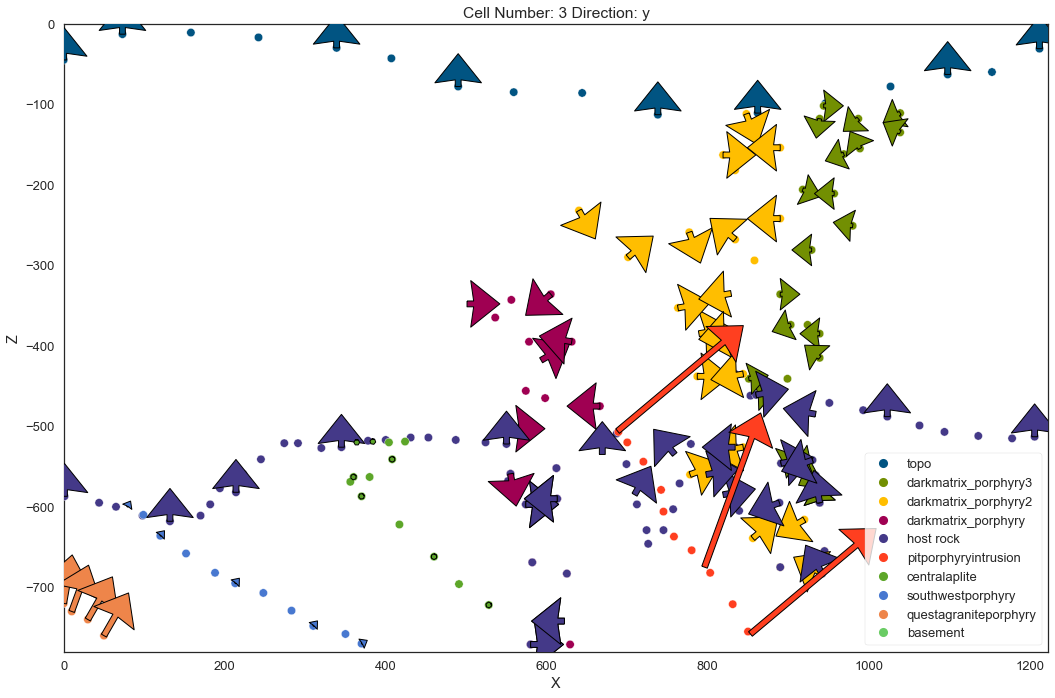

In [7]:
gp.plot_2d(geo_data, cell_number=3, show_data=True, figsize=(15,15))

In [8]:
geo_data.set_topography()

#geo_data.set_topography(source='random', fd=1.5, d_z=np.array([0, -100]), resolution=np.array([400, 400]))
#geo_model._grid.topography.save('test_topo')
#geo_model.set_topography(source='saved', filepath='test_topo.npy')

[-156.    0.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  12.23      ,   30.        , -772.2       ],
       [  12.23      ,   30.        , -756.6       ],
       [  12.23      ,   30.        , -741.        ],
       ...,
       [1223.        , 2877.55102041, -127.33908934],
       [1223.        , 2938.7755102 , -124.7007243 ],
       [1223.        , 3000.        , -124.38206172]])

In [9]:
interp_data = gp.set_interpolator(geo_data, compile_theano=True,theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                 values
range                          3332.29
$C_o$                        264384.02
drift equations  [3, 3, 3, 3, 3, 3, 3]


In [10]:
%%time
sol = gp.compute_model(geo_data, compute_mesh=True, debug=False)

Wall time: 31.8 s


C:\Users\pasha\python\lib\site-packages\gempy\core\solution.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(


C:\Users\pasha\python\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


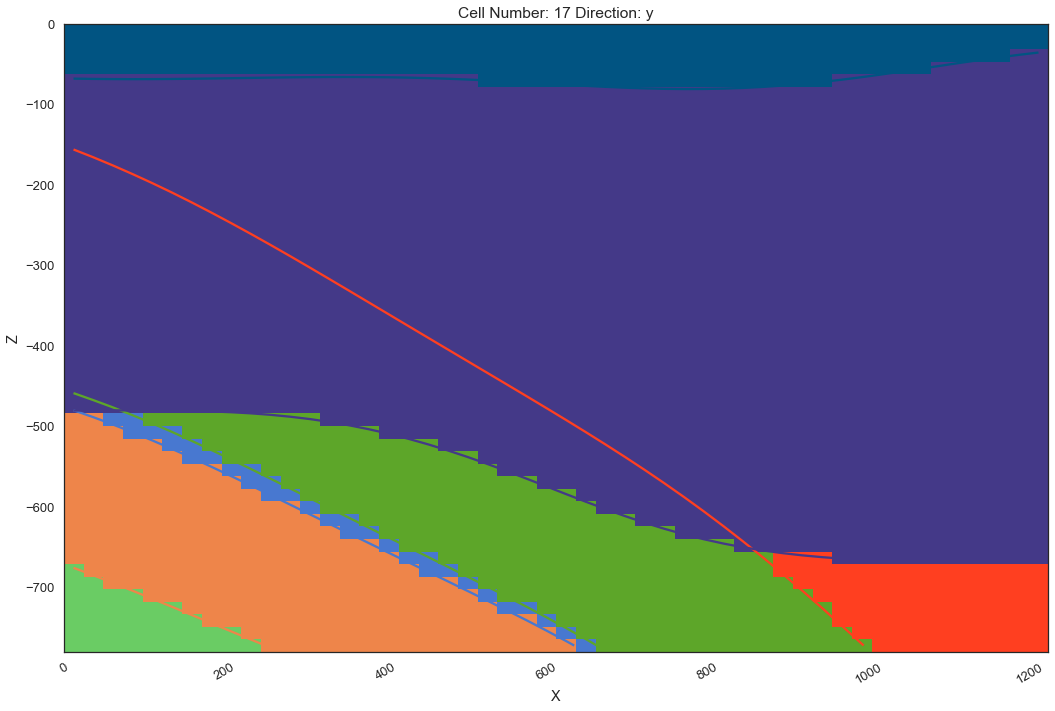

In [11]:
gp.plot_2d(geo_data, cell_number=17, show_data=False, figsize=(15,15))

In [26]:
p3d = gp.plot_3d(geo_data, plotter_type='background', show_lith=True, show_surfaces=True,  show_data=False, image=False,
                 show_topography=True,
                 kwargs_plot_structured_grid={'opacity': .7})

gp.save_model(geo_data)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


True

In [12]:
### User-defined functions
def extract_domain(sol, unit):
    '''
    Extract domain coordinates from gempy model by unit name
    arguments:
        sol: Gempy solution object.
        unit: gempy unit by index
    returns:
        dom_x, dom_y, dom_z: coordinates of domain
    '''

    # new version with rounding, definitely necessary
    rounded_lithblock = sol.lith_block.round(0)
    rounded_lithblock = rounded_lithblock.astype(int)

    # mask by array of input surfaces (by id, can be from different series)
    mask = np.isin(rounded_lithblock, unit)

    # get coordinates by mask, mesh_size is defined on in[55]
    #krig_lith = sol.lith_block[mask]
    dom_grid = sol.grid.values[:mesh_size][mask]

    dom_x = dom_grid[:,0]
    dom_y = dom_grid[:,1]
    dom_z = dom_grid[:,2]

    return dom_x, dom_y, dom_z

In [13]:
unit_count=int(np.max(sol.lith_block.round(0)))
series_count=len(sol.scalar_field_matrix)
unit_count, series_count

(10, 6)

### Geostatistics and Kriging

In [14]:
df =pd.read_csv('3_kriging_data_all.csv')
df

,X,Y,Z,grade_value
0,703.70,2500,-753.88,0.21
1,812.46,2500,-757.64,0.20
2,936.06,2500,-766.10,0.20
3,1054.72,2500,-761.40,0.21
4,1067.90,2500,-739.78,0.20
...,...,...,...,...
378,1160.22,500,-544.44,0.20
379,1157.85,500,-572.76,0.20
380,1137.73,500,-534.15,0.19
381,1109.31,500,-529.00,0.19


In [15]:
# create some random input data data (conditioning data)
n=len(df.iloc[:,2])
x = df.iloc[:n,0]
y = df.iloc[:n,1]
z = df.iloc[:n,2]
cond_pos = np.array([x,y,z])
cond_val = df.iloc[:n,3]

In [27]:
# This is to extract smaller domains from gempy by 

domain_x, domain_y, domain_z = extract_domain(sol, (5))

In [28]:
# grid coordinate preparation
coordinates = np.array([domain_x, domain_y, domain_z])
coordinates = coordinates.swapaxes(0,1)
    
# This is where the magic happens - GStools offers a lot of options, here a simple version with isotropic range
model = gs.Exponential(dim=3, var=np.var(cond_val), len_scale=200)
krige = gs.krige.Ordinary(model, cond_pos, cond_val)
cond_srf = gs.CondSRF(krige)

# perform kriging
krige((coordinates[:,0],coordinates[:,1], coordinates[:,2]), mesh_type='unstructured')
# alternatively fior SGS
#cond_srf((coordinates[:,0],coordinates[:,1], coordinates[:,2]), mesh_type='unstructured')

# just convenience rename
field = krige
# alternatively for SGS
# field = cond_srf

In [29]:
# convert to pyvista mesh
pc = field.to_pyvista()

In [30]:
# 3D plotting example
spacing = lambda arr: np.unique(np.diff(np.unique(arr)))
voxelsize = spacing(pc.points[:,0]), spacing(pc.points[:,1]), spacing(pc.points[:,2])

pc = pc.cast_to_unstructured_grid()

grade = PVGeo.filters.VoxelizePoints(dx=voxelsize[0][0], dy=voxelsize[1][0], dz=voxelsize[2][0], estimate=False).apply(pc)

In [32]:
#p.add_mesh(grid, opacity=1, show_edges=False, lighting=False, cmap=cmap)
p = pvqt.BackgroundPlotter()
gpv = gp.plot_3d(geo_data, plotter_type='background', show_data=False, show_lith=True, show_surfaces=False,
                kwargs_plot_structured_grid={'opacity': 1})

gpv.p.add_mesh(grade, opacity=0.8, clim=[0,1], show_edges=False, lighting=False, cmap="terrain")

p.set_scale(zscale=1)

In [21]:
#define grade intervals and check the count of voxels corresponding to the same interval
ore_interval1=[]
for index in tqdm(range(0, len(grade.active_scalars))):
    #for Cu Horizon I:
    if 0.2>grade.active_scalars[index]>0.1:
        ore_interval1.append(grade.active_scalars[index])
            
#calculate volume of total voxels corresponding to a certain ore grade interval
voxel_volume=((extent[1]-extent[0])/reso[0])*((extent[3]-extent[2])/reso[1])*((extent[5]-extent[4])/reso[2])

ore_avrg_grade=np.mean(ore_interval1)
volume=len(ore_interval1)*(voxel_volume)
print('Horizon1=',volume)
print("Average ore grade=", ore_avrg_grade)

100%|████████████████████████████████| 113280/113280 [01:07<00:00, 1676.80it/s]

Horizon1= 2225099391.84
Average ore grade= 0.14467156258258906


### Extract kriged data

In [63]:
%%time
main_array=pc.points.tolist()
added_array=grid.active_scalars.tolist()
n=len(main_array)

for index in range(0,n,1):
    main_array[index].append(added_array[index])
grade=pd.DataFrame(main_array, columns=['X','Y','Z','grade'])
grade

Wall time: 245 ms


,X,Y,Z,grade
0,12.23,30.0,-709.8,0.14
1,12.23,30.0,-694.2,0.14
2,12.23,30.0,-678.6,0.14
3,12.23,30.0,-663.0,0.14
4,12.23,30.0,-647.4,0.14
...,...,...,...,...
108120,1210.77,2970.0,-195.0,0.12
108121,1210.77,2970.0,-179.4,0.12
108122,1210.77,2970.0,-163.8,0.12
108123,1210.77,2970.0,-148.2,0.12


In [64]:
#drill boreholess!!
def krige_boreholes(b_count):
    borehole_count=range(0,b_count,1)
    rand_ind=random.sample(range(0,len(grade)),b_count)
    dict_all={}
    boreholes_dict={}

    for index in tqdm(borehole_count):
        list_temp=[]
        for row in grade.itertuples():
            if (grade.iloc[rand_ind[index]].X==row.X and grade.iloc[rand_ind[index]].Y==row.Y):
                list_temp.append([row.X,row.Y,row.Z,row.grade])
                
        dict_all.update({index+1:list_temp})

    for index in range(0,b_count,1): 
        data_temp = pd.DataFrame(dict_all[index+1])
        data_temp.columns=['X','Y','Z','grade']
        data_temp.loc[:, 'borehole']=index+1
        boreholes_dict.update({index+1:data_temp})
    return boreholes_dict
        
boreholes=krige_boreholes(100)

100%|████████████████████████████████████████| 100/100 [18:06<00:00, 10.87s/it]


In [65]:
drill_all = pd.concat(boreholes.values(), ignore_index=True)
drill_all

,X,Y,Z,grade,borehole
0,1186.31,1110.0,-772.2,0.15,1
1,1186.31,1110.0,-756.6,0.15,1
2,1186.31,1110.0,-741.0,0.15,1
3,1186.31,1110.0,-725.4,0.15,1
4,1186.31,1110.0,-709.8,0.15,1
...,...,...,...,...,...
4370,158.99,150.0,-148.2,0.14,100
4371,158.99,150.0,-132.6,0.14,100
4372,158.99,150.0,-117.0,0.14,100
4373,158.99,150.0,-101.4,0.14,100


In [67]:
list_tempo=[]
for index in range(0,len(drill_all),15):
    list_tempo.append(drill_all.iloc[index])
br=pd.DataFrame(list_tempo)

br.to_csv('3_kriging_100.csv')
br

,X,Y,Z,grade,borehole
0,1186.31,1110.0,-772.2,0.15,1.0
15,1186.31,1110.0,-538.2,0.15,1.0
30,1186.31,1110.0,-304.2,0.14,1.0
45,501.43,1230.0,-709.8,0.15,2.0
60,501.43,1230.0,-475.8,0.16,2.0
...,...,...,...,...,...
4305,623.73,2790.0,-475.8,0.14,99.0
4320,623.73,2790.0,-241.8,0.10,99.0
4335,158.99,150.0,-694.2,0.15,100.0
4350,158.99,150.0,-460.2,0.14,100.0


In [27]:
vertices = drill_all[['X','Y','Z']].values
kriged=pv.PolyData(vertices)
kriged['grade'] = drill_all['grade'].values
kriged

In [47]:
p = pvqt.BackgroundPlotter()
gpv = gp.plot_3d(geo_data, plotter_type='background', show_data=False, show_lith=True, show_surfaces=True,
                kwargs_plot_structured_grid={'opacity': .3})

#creating the grade mesh calculated with kriging (colormap) 
gpv.p.add_mesh(kriged, scalars='grade', opacity=1, cmap='viridis', point_size=5)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0000025CFCEA8640

### Extract orientation and point data from the solution with the same boreholes

In [64]:
def get_gradient(sol, res, dim):
    '''
    Calculate gradient from model solution
    '''
    # scalar field as meshgrid
    dict_all={}
    dict_spec={}
    for index in range(0,series_count,1):
        scalar_mgrid = sol.scalar_field_matrix[index].reshape(res)

        # calculate gradient
        gx, gy, gz = np.gradient(scalar_mgrid)

       
        vectors = np.array([gx.reshape(int(res[0] ** dim)), gy.reshape(int(res[0] ** dim)), gz.reshape(int(res[0] ** dim))])
        vectors = np.swapaxes(vectors, 0, 1)
        vectors = preprocessing.normalize(vectors, norm='l2')
        dict_all.update({index:vectors})
         
    
    for index in range(0,series_count,1):
            data_temp = pd.DataFrame(dict_all[index])
            dict_spec.update({'series_{}'.format(index):data_temp})
    return dict_spec

dict_spec=get_gradient(sol, res=[50,50,50], dim=3)

In [65]:
 # get coordinates
x = sol.grid.regular_grid.values[:, 0]
y = sol.grid.regular_grid.values[:, 1]
z = sol.grid.regular_grid.values[:, 2]
formation=sol.lith_block

for key,value in dict_spec.items():
    #load coordinate and formation array to the whole series dataframes
    value["X"]=x
    value['Y']=y
    value['Z']=z
    value['formation']=formation 
    #value = value.reset_index()
    #define column names
    value.columns=['G_x','G_y','G_z','X','Y','Z','formation']

In [66]:
# topo	Series0	1
# darkmatrix_porphyry3	Series1	2
# darkmatrix_porphyry2	Series2	3
# darkmatrix_porphyry	Series3	4
# host rock	Series4	5
# pitporphyryintrusion	Series5	6
# centralaplite	Series5	7
# southwestporphyry	Series5	8
# questagraniteporphyry	Series5	9

In [67]:
dict_spec['series_0']=dict_spec['series_0'][dict_spec['series_0'].formation==1]

dict_spec['series_1']=dict_spec['series_1'][dict_spec['series_1'].formation==2]

dict_spec['series_2']=dict_spec['series_2'][dict_spec['series_2'].formation==3]

dict_spec['series_3']=dict_spec['series_3'][dict_spec['series_3'].formation==4]

dict_spec['series_4']=dict_spec['series_4'][dict_spec['series_4'].formation==5]

dict_spec['series_5'] = dict_spec['series_5'].loc[dict_spec['series_5'].formation > 5]

In [68]:
orientations = pd.concat([dict_spec['series_0'],dict_spec['series_1'],dict_spec['series_2'],
                          dict_spec['series_3'],dict_spec['series_4'],dict_spec['series_5']],ignore_index=True)
orientations

,G_x,G_y,G_z,X,Y,Z,formation
0,4.06e-03,-0.02,1.00,12.23,30.0,-23.4,1.0
1,2.06e-03,-0.03,1.00,12.23,30.0,-7.8,1.0
2,-1.48e-02,-0.03,1.00,12.23,90.0,-23.4,1.0
3,-1.69e-02,-0.03,1.00,12.23,90.0,-7.8,1.0
4,-3.99e-02,-0.03,1.00,12.23,150.0,-23.4,1.0
...,...,...,...,...,...,...,...
124670,3.18e-01,0.41,0.86,1210.77,2970.0,-647.4,7.0
124671,3.16e-01,0.41,0.86,1210.77,2970.0,-631.8,7.0
124672,3.15e-01,0.40,0.86,1210.77,2970.0,-616.2,6.0
124673,3.13e-01,0.40,0.86,1210.77,2970.0,-600.6,6.0


In [69]:
unit=range(0,unit_count+1)
for index in unit:
    domain_x, domain_y, domain_z = extract_domain(sol, (unit[index+1]))
    coordinates = np.array([domain_x, domain_y, domain_z])
    coordinates = coordinates.swapaxes(0,1)
    data=pd.DataFrame(coordinates, columns=['X', 'Y','Z'])
    data.loc[:, 'formation'] =float(unit[index+1])
    data.to_csv(r'data_extracted/ideal/unit_{}.csv'.format(unit[index+1]), mode="w", index=False)

IndexError: range object index out of range

In [70]:
# if you want to join all files in the same folder
path =r'data_extracted/ideal'

filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
ideal = pd.concat(dfs, ignore_index=True)
ideal

,X,Y,Z,formation
0,12.23,30.0,-23.4,1.0
1,12.23,30.0,-7.8,1.0
2,12.23,90.0,-23.4,1.0
3,12.23,90.0,-7.8,1.0
4,12.23,150.0,-23.4,1.0
...,...,...,...,...
124995,1088.47,2250.0,-772.2,9.0
124996,1088.47,2310.0,-772.2,9.0
124997,1088.47,2370.0,-772.2,9.0
124998,1088.47,2430.0,-772.2,9.0


In [71]:
df_same = orientations.merge(ideal, left_on=('X','Y','Z','formation'), right_on=('X','Y','Z','formation'), how='inner')
df_same= df_same[df_same.formation != unit_count]
df_same

,G_x,G_y,G_z,X,Y,Z,formation
0,4.06e-03,-0.02,1.00,12.23,30.0,-23.4,1.0
1,2.06e-03,-0.03,1.00,12.23,30.0,-7.8,1.0
2,-1.48e-02,-0.03,1.00,12.23,90.0,-23.4,1.0
3,-1.69e-02,-0.03,1.00,12.23,90.0,-7.8,1.0
4,-3.99e-02,-0.03,1.00,12.23,150.0,-23.4,1.0
...,...,...,...,...,...,...,...
99907,3.18e-01,0.41,0.86,1210.77,2970.0,-647.4,7.0
99908,3.16e-01,0.41,0.86,1210.77,2970.0,-631.8,7.0
99909,3.15e-01,0.40,0.86,1210.77,2970.0,-616.2,6.0
99910,3.13e-01,0.40,0.86,1210.77,2970.0,-600.6,6.0


In [72]:
#drill boreholess!!
def d_boreholes(b_count):
    borehole_count=range(0,b_count,1)
    rand_ind=random.sample(range(0,len(df_same)),b_count)
    dict_all={}
    boreholes_dict={}

    for index in tqdm(borehole_count):
        list_temp=[]
        for row in df_same.itertuples():
            if (df_same.iloc[rand_ind[index]].X==row.X and df_same.iloc[rand_ind[index]].Y==row.Y):
                list_temp.append([row.X,row.Y,row.Z,row.G_x, row.G_y, row.G_z, row.formation])
                
        dict_all.update({index+1:list_temp})

    for index in range(0,b_count,1): 
        data_temp = pd.DataFrame(dict_all[index+1])
        data_temp.columns=['X','Y','Z','G_x','G_y','G_z','formation']
        data_temp.loc[:, 'borehole']=index+1
        boreholes_dict.update({index+1:data_temp})
    return boreholes_dict

#define desired number of boreholes
boreholes_dict=d_boreholes(100)

#join all borehole data into one dataframe
df = pd.concat(boreholes_dict.values(), ignore_index=True)
# boreholes_dict.to_csv('test100')

#load joined csv dataset
bore_count = df['borehole'].nunique()

#create mesh grid and define vertices, convert it to a pyvista poly data
vertices = df[['X', 'Y', 'Z']].values
grid=pv.PolyData(vertices)
grid['formation'] = df['formation'].values

In [86]:
unit=('topo','darkmatrix_porphyry3', 'darkmatrix_porphyry2','darkmatrix_porphyry','host rock','pitporphyryintrusion',
      'centralaplite','southwestporphyry','questagraniteporphyry')
   
for index in range(1,unit_count):
    df['formation'] = df.loc[:,'formation'].replace(index,unit[index-1])
df

,X,Y,Z,G_x,G_y,G_z,formation,borehole
0,379.13,2430.0,-23.4,-0.04,-0.44,0.90,topo,1.0
1,379.13,2430.0,-7.8,-0.04,-0.39,0.92,topo,1.0
2,379.13,2430.0,-538.2,-0.31,-0.05,0.95,host rock,1.0
3,379.13,2430.0,-522.6,-0.30,-0.04,0.95,host rock,1.0
4,379.13,2430.0,-507.0,-0.29,-0.03,0.96,host rock,1.0
...,...,...,...,...,...,...,...,...
4482,207.91,30.0,-631.8,0.42,-0.55,0.72,southwestporphyry,99.0
4483,207.91,30.0,-600.6,0.37,-0.66,0.65,centralaplite,99.0
4484,207.91,30.0,-585.0,0.35,-0.70,0.62,centralaplite,99.0
4485,207.91,30.0,-569.4,0.33,-0.74,0.59,centralaplite,99.0


In [201]:
p = pvqt.BackgroundPlotter()
gpv = gp.plot_3d(geo_data, plotter_type='background', show_data=False, show_lith=True, show_surfaces=True,
                kwargs_plot_structured_grid={'opacity': .3})

#creating the grade mesh calculated with kriging (colormap) 
gpv.p.add_mesh(grid, scalars='formation', opacity=1, cmap='Paired', point_size=10)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0000025275471400

In [87]:
#picking lowermost boundary for each formation through the borehole data 

dict_all=[]
list_temp=[]

for br in range(1,bore_count+1,1):
    for fr in range(1,unit_count+1,1):
          list_temp.append(df[(df['borehole']==br) & (df['formation']==unit[fr-2])])
list_temp2=[]
for i in list_temp:
    if(not i.empty):
        list_temp2.append(i.iloc[0])
df_b=pd.DataFrame(list_temp2, index=range(0,len(list_temp2),1))
del df_b['borehole']
df_b

,X,Y,Z,G_x,G_y,G_z,formation
0,379.13,2430.0,-772.2,0.37,-0.11,0.92,questagraniteporphyry
1,379.13,2430.0,-23.4,-0.04,-0.44,0.90,topo
2,379.13,2430.0,-538.2,-0.31,-0.05,0.95,host rock
3,379.13,2430.0,-678.6,0.16,-0.18,0.97,centralaplite
4,379.13,2430.0,-772.2,0.37,-0.11,0.92,questagraniteporphyry
...,...,...,...,...,...,...,...
489,12.23,2550.0,-117.0,-0.13,-0.13,0.98,topo
490,12.23,2550.0,-553.8,0.08,0.05,1.00,host rock
491,12.23,2550.0,-647.4,0.14,0.04,0.99,centralaplite
492,12.23,2550.0,-663.0,0.15,0.03,0.99,southwestporphyry


In [88]:
#picking lowermost boundary for each formation through the borehole data 

dict_all1=[]
list_temp1=[]

for br in range(1,bore_count+1,1):
    for fr in range(1,unit_count+1,1):
          list_temp1.append(df[(df['borehole']==br) & (df['formation']==unit[fr-2])])
list_temp2=[]
for df in list_temp1:
    if(not df.empty):
        list_temp2.append(df.iloc[-1])
df_f=pd.DataFrame(list_temp2, index=range(0,len(list_temp2),1))
del df_f['borehole']
df_f1=df_f[df_f['formation']=='darkmatrix_porphyry3']
df_f2=df_f[df_f['formation']=='darkmatrix_porphyry2']
df_f3=df_f[df_f['formation']=='darkmatrix_porphyry']
df_f_all=pd.concat([df_f1,df_f2,df_f3])
df_f_all

,X,Y,Z,G_x,G_y,G_z,formation
152,550.35,510.0,-366.6,0.88,-0.44,0.20,darkmatrix_porphyry
202,599.27,510.0,-335.4,-0.71,-0.30,-0.64,darkmatrix_porphyry


In [80]:
joined=pd.concat([df_b,df_f_all])
#joined[joined['formation']=='pipe']

t = pd.CategoricalDtype(categories=['topo','darkmatrix_porphyry3', 'darkmatrix_porphyry2','darkmatrix_porphyry','host rock','pitporphyryintrusion',
      'centralaplite','southwestporphyry','questagraniteporphyry'], ordered=True)
joined['formation']=pd.Series(joined.formation, dtype=t)
joined.sort_values(by=['formation'],inplace=True)
joined

,X,Y,Z,G_x,G_y,G_z,formation
78,574.81,1950.0,-54.6,-4.10e-02,-0.06,1.00,topo
69,697.11,1890.0,-54.6,-7.20e-03,-0.22,0.98,topo
281,354.67,1590.0,-85.8,-1.26e-01,-0.29,0.95,topo
459,1064.01,2250.0,-7.8,-1.15e-01,-0.17,0.98,topo
212,746.03,1350.0,-85.8,4.00e-02,0.26,0.97,topo
...,...,...,...,...,...,...,...
274,134.53,30.0,-741.0,4.58e-01,0.07,0.89,questagraniteporphyry
279,134.53,30.0,-741.0,4.58e-01,0.07,0.89,questagraniteporphyry
280,354.67,1590.0,-772.2,5.96e-01,-0.03,0.80,questagraniteporphyry
285,525.89,1530.0,-772.2,5.62e-01,-0.31,0.77,questagraniteporphyry


In [81]:
joined.to_csv(r'data_all_test100_1.csv', mode="w", index=False)